Optimizing interatomic potentials parameters for OXIDE(O2) using Buckingham potentials.

In [ ]:
!pip install tensorflow==2.1.0

     |████████████████████████████████| 421.8MB 38kB/s 
     |████████████████████████████████| 3.9MB 30.9MB/s 
     |████████████████████████████████| 450kB 40.1MB/s 
  Created wheel for gast: filename=gast-0.2.2-cp36-none-any.whl size=7540 sha256=a2fb3f802ac61e81c089e947dbe251d6d3b9f9cbf5f8e98e598ee16045e3e97a
  Stored in directory: /root/.cache/pip/wheels/5c/2e/7e/a1d4d4fcebe6c381f378ce7743a3ced3699feb89bcfbdadadd
Successfully built gast
ERROR: tensorflow-probability 0.10.0 has requirement gast>=0.3.2, but you'll have gast 0.2.2 which is incompatible.
  Found existing installation: tensorboard 2.2.2
    Uninstalling tensorboard-2.2.2:
      Successfully uninstalled tensorboard-2.2.2
  Found existing installation: gast 0.3.3
    Uninstalling gast-0.3.3:
      Successfully uninstalled gast-0.3.3
  Found existing installation: tensorflow-estimator 2.2.0
    Uninstalling tensorflow-estimator-2.2.0:
      Successfully uninstalled tensorflow-estimator-2.2.0
  Found existing installation: 

In [ ]:
! pip install --upgrade dftbook
import dftbook
dftbook.setup_colab()

Please be patient. This takes about 30 seconds.
Installing ASE
Installing ase-espresso
Installing pseudopotentials
Renaming pseudopotentials
Almost there, setting environment pseudopotential path
Installing quantum espresso
Setup is complete. Please visit https://github.com/jkitchin/dft-book-espresso to find the tutorials.
Installation took 32.9 seconds


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from google.colab import files
import tensorflow as tf
import math
from ase.calculators.emt import EMT
from ase import Atoms

atoms = Atoms('O2',[[0, 0, 0],[10, 0, 0]], pbc=[False, False, False])
atoms.set_calculator(EMT())

print ('tensorflow version: ' + tf.__version__)

#create noisy data
e0 = atoms.get_potential_energy()
# Array of bond lengths to get the energy for
d = np.linspace(1.2, 8, 50)

def get_e(distance):
    a = atoms.copy()
    a[1].x = distance
    a.set_calculator(EMT())
    e = a.get_potential_energy()
    return e

e = np.array([get_e(dist) for dist in d])
e -=  e0  # set the energy zero
print(e)
print('data created successful')


ModuleNotFoundError: ignored

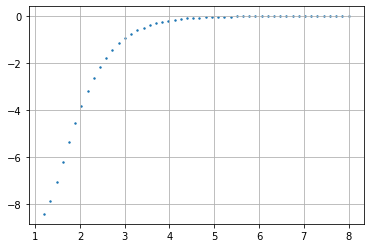

In [ ]:
plt.scatter(d, e, s=2)
plt.grid()
plt.show()

In [ ]:
#create the model
from tensorflow import keras
model = keras.Sequential()
model.add(keras.layers.Dense(units = 1, activation = 'tanh', input_shape =[1]))
model.add(keras.layers.Dense(units = 64, activation = 'relu'))
model.add(keras.layers.Dense(units = 64, activation = 'relu'))
model.add(keras.layers.Dense(units = 1, activation = 'linear'))
model.compile(loss='mse', optimizer="adam")

model.summary()


Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 1)                 2         
_________________________________________________________________
dense_13 (Dense)             (None, 64)                128       
_________________________________________________________________
dense_14 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_15 (Dense)             (None, 1)                 65        
Total params: 4,355
Trainable params: 4,355
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.fit(d,e, epochs=100, verbose=1)

Epoch 1/100
2/2 [==============================] - 0s 2ms/step - loss: 0.2824
Epoch 2/100
2/2 [==============================] - 0s 2ms/step - loss: 0.2783
Epoch 3/100
2/2 [==============================] - 0s 2ms/step - loss: 0.2790
Epoch 4/100
2/2 [==============================] - 0s 2ms/step - loss: 0.2775
Epoch 5/100
2/2 [==============================] - 0s 2ms/step - loss: 0.2756
Epoch 6/100
2/2 [==============================] - 0s 1ms/step - loss: 0.2744
Epoch 7/100
2/2 [==============================] - 0s 2ms/step - loss: 0.2744
Epoch 8/100
2/2 [==============================] - 0s 2ms/step - loss: 0.2737
Epoch 9/100
2/2 [==============================] - 0s 2ms/step - loss: 0.2728
Epoch 10/100
2/2 [==============================] - 0s 2ms/step - loss: 0.2714
Epoch 11/100
2/2 [==============================] - 0s 2ms/step - loss: 0.2707
Epoch 12/100
2/2 [==============================] - 0s 2ms/step - loss: 0.2702
Epoch 13/100
2/2 [==============================] - 0s 2ms/st

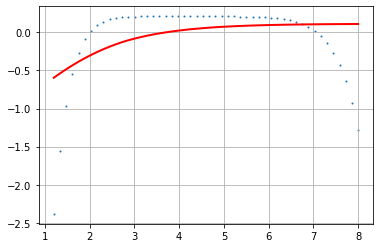

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<Figure size 432x288 with 0 Axes>

In [ ]:
y_pred = model.predict(d)

plt.scatter(d, e, s=1)
plt.plot(d,y_pred,'r',linewidth=2)
plt.grid()
plt.show()
plt.savefig('dataset.png',dpi=300)
files.download('dataset.png')

In [ ]:
pip install pycse

     |████████████████████████████████| 61kB 4.3MB/s 
     |████████████████████████████████| 256kB 13.7MB/s 
     |████████████████████████████████| 92kB 7.8MB/s 
  Created wheel for quantities: filename=quantities-0.12.4-cp36-none-any.whl size=79167 sha256=9feac992c97303f28c0d5756cef70c6222cc540018c87ff53a9c49581f1c1192
  Stored in directory: /root/.cache/pip/wheels/2c/27/a5/62fb2a57d167d7b7164278de7399ba1504321c1d6c3a3802d5
Successfully built quantities


Parameters =  [-1975.9875851      4.2048919    -31.02872271]
Confidence intervals = 
array([[-4.54484853e+03,  5.92873355e+02],
       [ 3.82394570e+00,  4.58583810e+00],
       [-7.14889403e+01,  9.43149484e+00]])


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

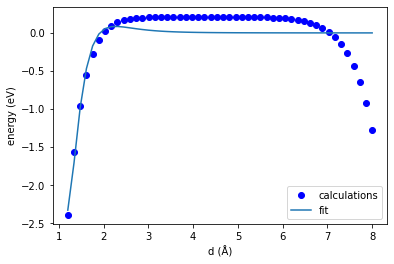

In [ ]:
#Buckingham formula
def model(r, A, B, C):
    return A * np.exp(-B * r) - C / r**6

from pycse import nlinfit
import pprint

p0 = [-80, 1, 1]
p, pint, se = nlinfit(model, d, e, p0, 0.05)
print('Parameters = ', p)
print('Confidence intervals = ')
pprint.pprint(pint)
plt.plot(d, e, 'bo ', label='calculations')

x = np.linspace(min(d), max(d))
plt.plot(x, model(x, *p), label='fit')
plt.legend(loc='best')
plt.xlabel('d (Å)')
plt.ylabel('energy (eV)')
plt.savefig('dataset.png',dpi=300)
files.download('dataset.png')

In [ ]:
pip install scikit-neuralnetwork

     |████████████████████████████████| 133kB 18.7MB/s 
  Created wheel for scikit-neuralnetwork: filename=scikit_neuralnetwork-0.7-cp36-none-any.whl size=41700 sha256=5e0f42777381b622a3b487778d75530afa384dc173194247b987a31c4d3cea66
  Stored in directory: /root/.cache/pip/wheels/7a/2c/db/ad3c876767bfdaf955ede9b7c0315a99abb12c0bdd2a469eff
  Created wheel for Lasagne: filename=Lasagne-0.1-cp36-none-any.whl size=79275 sha256=f3e2d0c27c57e618fdce61530d7e4cc67d828a71bb4d224f4e23cf11211335a3
  Stored in directory: /root/.cache/pip/wheels/a5/8e/31/b4cae7e5507f8582e77d7f5cf2815be8820ccacfa0519ca60c
Successfully built scikit-neuralnetwork Lasagne


In [ ]:
from sknn.mlp import Regressor, Layer


In [ ]:
D = np.linspace(1.2, 8, 500)

def get_e(distance):
    a = atoms.copy()
    a[1].x = distance
    a.set_calculator(EMT())
    e = a.get_potential_energy()
    return e

E = np.array([get_e(dist) for dist in D])
E -=  e0  # set the energy zero

X_train = np.row_stack(np.array(D))

N = 100 # 100 hidden layers
nn = Regressor(layers=[Layer("Tanh", units=N),
                       Layer('Linear')])
nn.fit(X_train, E)

dfit = np.linspace(min(D), max(D))

efit = nn.predict(np.row_stack(dfit))

WARNING (theano.tensor.blas): We did not find a dynamic library in the library_dir of the library we use for blas. If you use ATLAS, make sure to compile it with dynamics library.


Parameters =  [-2081.14618973     4.16014429   -35.93244544]
Confidence intervals = 
array([[-2769.98179399, -1392.31058547],
       [    4.05731998,     4.26296859],
       [  -48.34994838,   -23.5149425 ]])


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

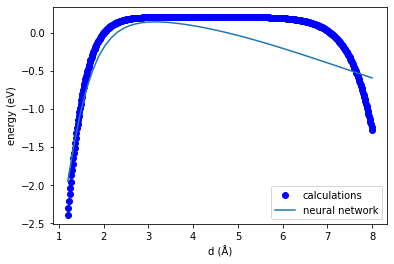

In [ ]:
p1 = p #initial guess of the variables, 0.05 is the 95% confidence interval
g, pint, se = nlinfit(model, D, E,p1, 0.05)
print('Parameters = ', g)
print('Confidence intervals = ')
pprint.pprint(pint)
plt.plot(D, E, 'bo ', label='calculations')
#plt.plot(d, e, 'bo ')
plt.plot(dfit, efit)
plt.legend(['calculations', 'neural network'])
plt.xlabel('d (Å)')
plt.ylabel('energy (eV)')
plt.savefig('dataset.png',dpi=300)
files.download('dataset.png')

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_36 (Dense)             (None, 10)                20        
_________________________________________________________________
dense_37 (Dense)             (None, 64)                704       
_________________________________________________________________
dense_38 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_39 (Dense)             (None, 10)                650       
Total params: 5,534
Trainable params: 5,534
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
167/167 [==============================] - 0s 2ms/step - loss: 0.2021
Epoch 2/100
167/167 [==============================] - 0s 1ms/step - loss: 0.1746
Epoch 3/100
167/167 [==============================] - 0s 1ms/step - loss: 0.1387
Epoc

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

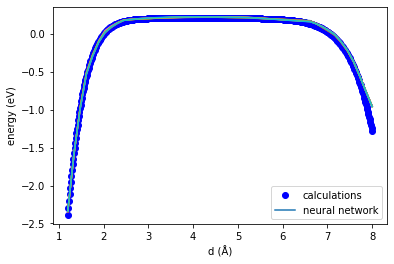

In [ ]:
D = np.linspace(1.2, 8, 500)

def get_e(distance):
    a = atoms.copy()
    a[1].x = distance
    a.set_calculator(EMT())
    e = a.get_potential_energy()
    return e

E = np.array([get_e(dist) for dist in D])
E -=  e0  # set the energy zero

X_train = np.row_stack(np.array(D))

N = 10    # 100 hidden layers

from tensorflow import keras
nn = keras.Sequential()
nn.add(keras.layers.Dense(units = N, activation = 'tanh', input_shape =[1]))
nn.add(keras.layers.Dense(units = 64, activation = 'relu'))
nn.add(keras.layers.Dense(units = 64, activation = 'relu'))
nn.add(keras.layers.Dense(units = N, activation = 'linear'))
nn.compile(loss='mse', optimizer="adam")

nn.summary()
#fitting the model
#model.fit(d,e, epochs=100, verbose=1)

#predictions
#y_pred = model.predict(d)

nn.fit(X_train, E, epochs=100, verbose=1,batch_size=3)

dfit = np.linspace(min(D), max(D))

efit = nn.predict(np.row_stack(dfit))

p1 = [-100, 1, 32] #initial guess of the variables, 0.05 is the 95% confidence interval
g, pint, se = nlinfit(model, D, E,p1, 0.05)
print('Parameters = ', g)
print('Confidence intervals = ')
pprint.pprint(pint)
plt.plot(D, E, 'bo ', label='calculations')
#plt.plot(d, e, 'bo ')
plt.plot(dfit, efit)
plt.legend(['calculations', 'neural network'])
plt.xlabel('d (Å)')
plt.ylabel('energy (eV)')
plt.savefig('dataset.png',dpi=300)
files.download('dataset.png')

optimised parameters oxide(O2) using the buckingham potentials are :-2081.1509445       4.16014559       -35.93247048